# Gap Fit using descriptors: distante 2b, angle 3b- simon 

## Importing modules and classes

In [18]:
# Using the model with the simplest descriptor, 2b - two body distance
from gap_models2 import GAPModel
from gap_descriptors import distance_2b
from gap_descriptors import angle_3b

## Creating instances of models and descriptors

In [19]:
# Initialize distance_2b descriptor
descriptor_2b = distance_2b(cutoff=4,covariance_type='ard_se',delta=0.5,theta_uniform=1.0,sparse_method='uniform',add_species='T',n_sparse=10)

 distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10


In [20]:
# Initialize angle_3b descriptor
descriptor_3b = angle_3b(cutoff=3.5,covariance_type='ard_se',delta=0.5, theta_fac=0.5, add_species='T', n_sparse=30, sparse_method='uniform')

 angle_3b cutoff = 3.5 covariance_type = ard_se delta = 0.5 theta_fac = 0.5 sparse_method = uniform add_species = T n_sparse = 30


In [21]:
# Make instances of GAPModel
model = GAPModel()


## Splitting up the Data into training data and test data

In [22]:
from gap_models2 import Split

In [23]:
# Create split object and pass in the data that needs to be split and the percentage of the training data 
data_file = "/Users/simon/simon_ml/GAP/hydrogen_md.xyz"
train_percentage = 0.8

split = Split(data_file, train_percentage)

In [24]:
# Get percentages 
split.get_percentages()

' Percentile of training data: 0.8 |  Percentile of test data: 0.19999999999999996 '

In [25]:
# Split up the data. Here the output_file_names need to be passed in order to avoid overwriting later. 
train_data_file = '2b3btrain_data_file.xyz'
test_data_file = '2b3btest_data_file.xyz'
split.split(train_data_file,test_data_file)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


In [26]:
# Get the splitted data
train,test = split.get_splitted_data()

In [27]:
# Get the names of the data files containing the splitted data. These are needed for the model.train and 
# model.predict methods. 
train_data_file, test_data_file = split.get_splitted_data_files()


## Training the model

In [29]:
# Getting the parameters
d2b_parameters = descriptor_2b.get_parameter_string()
a3b_parameters = descriptor_3b.get_parameter_string()

# Choose training data and add
train_data_file 

# Choose test data
test_data_file

# Choose filename to be of trained GAP Potential. 
GAP_potential = '2bGAP.xml'

# Train the model
model.train(d2b_parameters, a3b_parameters, training_data=train_data_file,GAP_potential=GAP_potential)

# Print out file in which the potential is stored
model.get_potential_file()





 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = 2bGAP.xml at_file = '2b3btrain_data_file.xyz'  default_sigma = {0.008 0.04 0 0} gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10: angle_3b cutoff = 3.5 covariance_type = ard_se delta = 0.5 theta_fac = 0.5 sparse_method = uniform add_species = T n_sparse = 30}
libAtoms::Hello World: 01/03/2021   20:08:44
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 72524300
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = 2

'/Users/simon/simon_ml/GAP/2bGAP.xml'

## Making predictions 

In [11]:
# Select which configuration you want to predict the energy for, let´s first predict energy and forces for 
# the training configuration. Secondly test the model on the test data, remember that both predictions are based 
# upon the same trained GAP Potential. 

test_data_tr = train_data_file
test_data_te = test_data_file

# Get trained potential
GAP_potential = model.get_potential_file()


# Select filename in which predictions should be stored for train data 
QUIP_Prediction2b3b_tr = '2b3bquip_prediction_tr.xyz'


# Use predict method on training data as test data 
model.predict(Test_Data=test_data_tr, GAP_potential=GAP_potential, QUIP_Prediction=QUIP_Prediction2b_tr)
print(model.get_prediction_file())


# Select filename in which predictions should be stored for test data
QUIP_Prediction2b3b_te = '2b3bquip_prediction_te.xyz'

# Use predict method on test data as test data
model.predict(Test_Data=test_data_tr, GAP_potential=GAP_potential, QUIP_Prediction=QUIP_Prediction2b_te)
print(model.get_prediction_file())

 quip E=T F=T  atoms_filename='2btrain_data_file.xyz'  param_filename='/Users/simon/simon_ml/GAP/2bGAP.xml' | grep AT | sed 's/AT//'  > 2bquip_prediction_tr.xyz 

/Users/simon/simon_ml/GAP/2bquip_prediction_tr.xyz
 quip E=T F=T  atoms_filename='2btrain_data_file.xyz'  param_filename='/Users/simon/simon_ml/GAP/2bGAP.xml' | grep AT | sed 's/AT//'  > 2bquip_prediction_te.xyz 

/Users/simon/simon_ml/GAP/2bquip_prediction_te.xyz


## Plot real values against predicted values to see quality of the fit

In [12]:
from gapplot import QualityPlot
import matplotlib.pyplot as plt



[-2.244962282135417, -2.2453941820833334, -2.2461952821354165, -2.245164891302083, -2.2463680481770836, -2.246880423802083, -2.2463577058333333, -2.24817987859375, -2.246701410625, -2.246003494895833, -2.2456472738541664, -2.245474264583333, -2.2451504565625, -2.2462168677604164, -2.2463391968229165, -2.2447664765104167, -2.2467424226562502, -2.2470864452083332, -2.245734479427083, -2.2457037650520832, -2.2460340127083334, -2.2470984813541666, -2.24460041625, -2.245661888854167, -2.2466832132291668, -2.245983086510417, -2.2465889082291666, -2.2450639713541665, -2.2472037406770835, -2.2459335802083333, -2.244114574583333, -2.2452429702083334, -2.24446667296875, -2.2462067291145833, -2.2452375803125, -2.24489444890625, -2.247457318020833, -2.2453744952083334, -2.24473497109375, -2.2459292770312502, 0.0]
[-2.245817533759805, -2.2459401565398154, -2.245882021016269, -2.245821935402913, -2.245911963876985, -2.245924054180963, -2.245873916169766, -2.245912892739009, -2.2459219342081505, -2.2

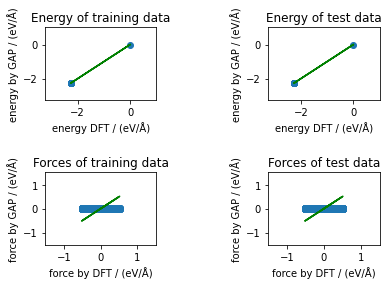

In [13]:
# Make instance of QualityPlot which contains the plot methods
# Make instance of plt.subplots object to make nice table of multiple subplots
QP = QualityPlot()
figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

# Plot energies and pass them on to axis object.
QP.energies_on_energies(real_values=test_data_tr, predicted_values=QUIP_Prediction2b_tr, axis=axs[0,0],label="Energy of training data")
QP.energies_on_energies(real_values=test_data_tr,predicted_values=QUIP_Prediction2b_te, axis=axs[0,1], label="Energy of test data")

# Plot forces and pass them on to axis object.
QP.forces_on_forces(real_values=test_data_tr, predicted_values=QUIP_Prediction2b_tr, axis=axs[1,0],label="Forces of training data")
QP.forces_on_forces(real_values=test_data_tr,predicted_values=QUIP_Prediction2b_te, axis=axs[1,1], label="Forces of test data")